**Importing Necessary Libraries**

In [63]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
import numpy as np
import random

#### a) **Implement Quantum Gates Using Teleportation**
   - We set up the entangled pair (ebit) between Alice's and Bob's qubits using Hadamard and CNOT gates.
   - We initialize the qubit to teleport (`Q`) in different states based on `input_state`.

#### b) **Use Barrier Function to Create Visual Separation**
   - Barriers are added to visually separate each step of the protocol for clarity. These appear after entangling, Alice’s operations, and measurements.

#### c) **Test the Protocol with Different State Vectors**
   - The protocol is tested with different state vectors (|0⟩, |1⟩, or a random state) by initializing the qubit accordingly.

#### d) **Proof that Q was Successfully Teleported to B**
   - After completing Alice’s and Bob's steps, Bob’s qubit (`B`) is measured.
   - The final measurement results are displayed as a histogram to confirm that the state has been successfully transferred from `Q` to `B`.

In [77]:
def teleportation_protocol(input_state):

    state_vector = Statevector.from_label(f"{input_state}")
    display(f"Initial State:",state_vector.draw("latex"))    

    qubit = QuantumRegister(1, "Q")  
    ebit0 = QuantumRegister(1, "A")   
    ebit1 = QuantumRegister(1, "B")   
    a = ClassicalRegister(1, "a")     
    b = ClassicalRegister(1, "b")

    protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

    # a) Implement quantum gates using teleportation
    protocol.h(ebit0)     
    protocol.cx(ebit0, ebit1) 
    
    if input_state == 0:
        protocol.initialize([1, 0], qubit)  
    elif input_state == 1:
        protocol.initialize([0, 1], qubit)  
    else:
        theta, phi, lam = random.random() * 2 * np.pi, random.random() * 2 * np.pi, random.random() * 2 * np.pi
        random_gate = UGate(theta, phi, lam)
        protocol.append(random_gate, [qubit[0]])
    
    # b) Use the barrier function to create visual separation
    protocol.barrier()

    protocol.cx(qubit, ebit0)  
    protocol.h(qubit) 
    protocol.barrier()

    protocol.measure(ebit0, a)
    protocol.measure(qubit, b)
    protocol.barrier()

    with protocol.if_test((a, 1)):
        protocol.x(ebit1)
    with protocol.if_test((b, 1)):
        protocol.z(ebit1)
    
    # c) Test that the protocol works correctly for different state vectors
    display(protocol.draw(output="mpl"))

    # d) Proof that Q was successfully teleported into B
    result = ClassicalRegister(1, "Result")
    protocol.add_register(result)
    protocol.measure(ebit1, result)

    simulator = AerSimulator()
    results = simulator.run(protocol).result()
    statistics = results.get_counts()

    display(plot_histogram(statistics))

    filtered_statistics = marginal_distribution(statistics, [2])
    
    display(plot_histogram(filtered_statistics))

## Initial State Vector is 0

'Initial State:'

<IPython.core.display.Latex object>

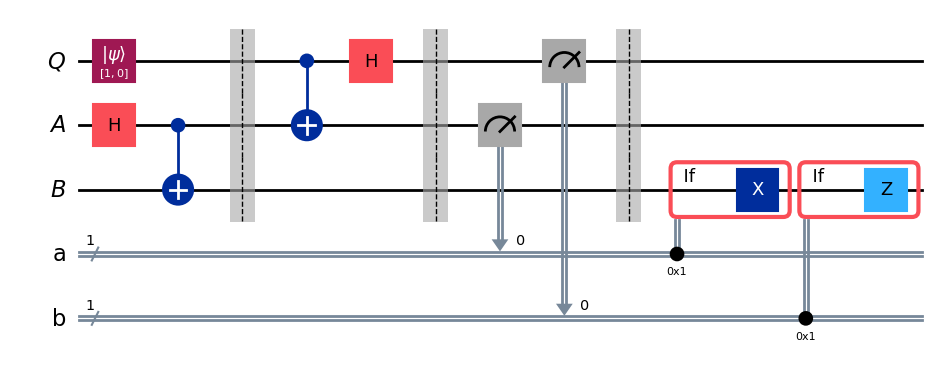

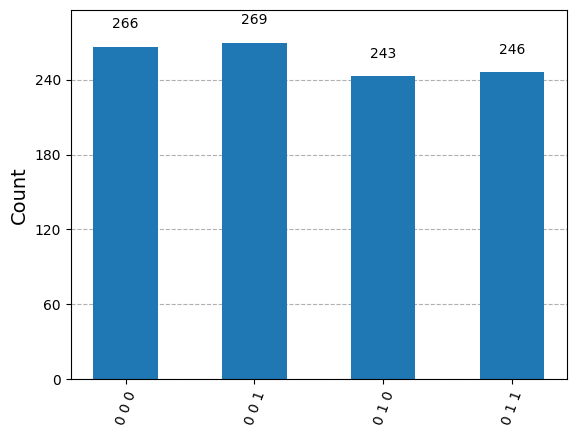

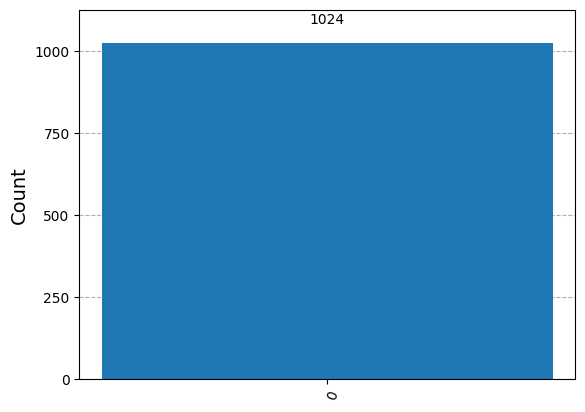

In [78]:
teleportation_protocol(0)

# Initial State Vector is 1

<IPython.core.display.Latex object>

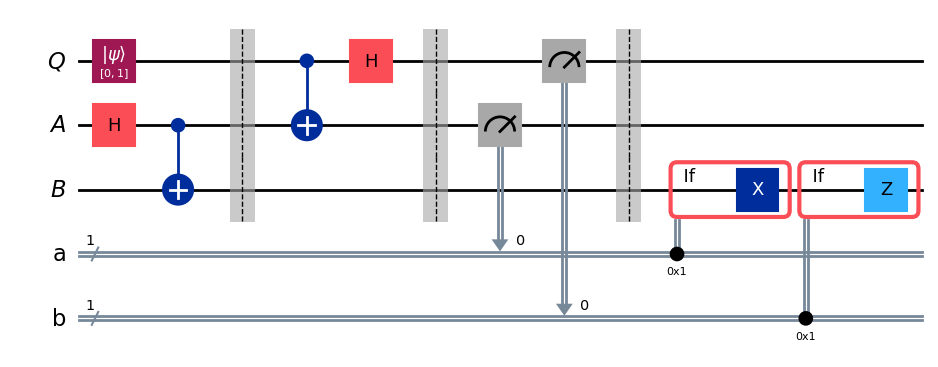

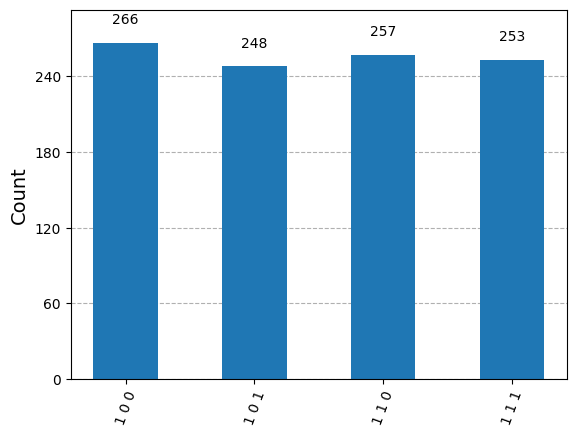

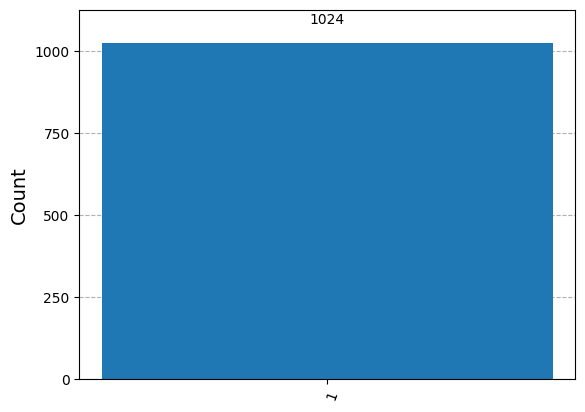

In [74]:
teleportation_protocol(1)